## Rock Paper Scissors Classifier

Klasifikasi gambar gunting-kertas-batu dalam rangka tugas akhir course "Belajar Machine Learning untuk Pemula" oleh Dicoding

In [72]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import zipfile

In [73]:
# load dataset

zip_ref = zipfile.ZipFile("./rockpaperscissors.zip", "r")
zip_ref.extractall()
zip_ref.close()

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=180,
    horizontal_flip=False,
    vertical_flip=True,
    shear_range=0,
    fill_mode="nearest",
    validation_split=0.4   # 40% validation, 60% training
)

data_dir = "./rockpaperscissors/rps-cv-images/"

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(200, 300),
    batch_size=32,
    class_mode="sparse",
    subset="training"
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(200, 300),
    batch_size=32,
    class_mode="sparse",
    subset="validation"
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [74]:
# create model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(200, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="nadam",
              metrics=['accuracy'])

In [75]:
# train model

history = model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=40,
    validation_data=validation_generator,
    validation_steps=10
)

acc = 100 * history.history["val_accuracy"][-1]
print("validation accuracy of final epoch:", round(acc, 4), "%")

Epoch 1/40
20/20 [==============================] - 41s 2s/step - loss: 1.0871 - accuracy: 0.4469 - val_loss: 0.9697 - val_accuracy: 0.5406
Epoch 2/40
20/20 [==============================] - 37s 2s/step - loss: 0.8894 - accuracy: 0.5902 - val_loss: 1.0757 - val_accuracy: 0.4313
Epoch 3/40
20/20 [==============================] - 38s 2s/step - loss: 0.8027 - accuracy: 0.6262 - val_loss: 0.7499 - val_accuracy: 0.7000
Epoch 4/40
20/20 [==============================] - 37s 2s/step - loss: 0.7157 - accuracy: 0.7066 - val_loss: 1.1294 - val_accuracy: 0.5125
Epoch 5/40
20/20 [==============================] - 38s 2s/step - loss: 0.6060 - accuracy: 0.7422 - val_loss: 0.5263 - val_accuracy: 0.8000
Epoch 6/40
20/20 [==============================] - 39s 2s/step - loss: 0.5037 - accuracy: 0.7906 - val_loss: 0.4881 - val_accuracy: 0.8156
Epoch 7/40
20/20 [==============================] - 39s 2s/step - loss: 0.3953 - accuracy: 0.8531 - val_loss: 0.3865 - val_accuracy: 0.8562
Epoch 8/40
20/20 [==

Saving 2IOsxsG8AaxntdJM.png to 2IOsxsG8AaxntdJM.png
hasil prediksi: paper


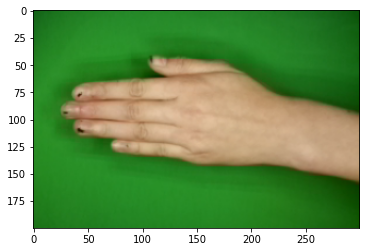

In [76]:
# upload image
# source: latihan 12 modul "Belajar Machine Learning Untuk Pemula" by Dicoding

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

class_encoding = ["paper", "rock", "scissors"]

for path in files.upload().keys():
    img = image.load_img(path, target_size=(200,300))

    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    pred = model.predict(images, batch_size=16)
    print("hasil prediksi:", class_encoding[np.argmax(pred)])